# Individual-level decoding example

Written by Ladislas Nalborczyk (ladislas.nalborczyk@gmail.com). Last updated on February 1, 2024.

In [15]:
# !yes | pip uninstall meg_decoding_tools
# ! pip install git+https://github.com/lnalborczyk/meg_decoding_tools
# ! pip install git+https://github.com/mitchellostrow/DSA

In [16]:
import mne
import numpy as np
from meeg.decoding import time_decode
from meeg.decoding import prep_data_for_decoding
from meeg.plots import plotting_decoding_scores

In [17]:
# importing the examplary data (MNE epochs of MEG data)
visual_4l2s = mne.read_epochs("../src/meeg/data/visual_4l2s-epo.fif")
visual_7l2s = mne.read_epochs("../src/meeg/data/visual_7l2s-epo.fif")

Reading /Users/ladislas/Desktop/meg_decoding_tools/examples/../src/meeg/data/visual_4l2s-epo.fif ...


    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Adding metadata with 13 columns
160 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/ladislas/Desktop/meg_decoding_tools/examples/../src/meeg/data/visual_7l2s-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Adding metadata with 13 columns
159 matching events found
No baseline correction applied
0 projection items activated


In [18]:
# for decoding, we'll keep only two categories and concatenate those
decoding_epochs = mne.concatenate_epochs(
    epochs_list=[visual_4l2s, visual_7l2s],
    add_offset=True, on_mismatch="raise", verbose=None
    )

# preparing MNE epochs and labels for decoding
X, y = prep_data_for_decoding(
    epochs=decoding_epochs,
    pca=True, n_components=60,
    moving_average=True, kernel_size=5,
    trials_averaging=False, ntrials=2, shuffling_or_not=True
)

Adding metadata with 13 columns
319 matching events found
No baseline correction applied
Original shape of the MEG data: (319, 306, 251)
Length of the labels to be predicted: 319


/Users/ladislas/Desktop/meg_decoding_tools/.venv/lib/python3.10/site-packages/meeg/decoding/prepare.py:170: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = epochs.get_data()


Moving average applied with kernel size: 5
PCA explained variance:0.989


In [19]:
# decoding time!
scores, time_decod = time_decode(meg_data=X, labels=y, verbose=False)

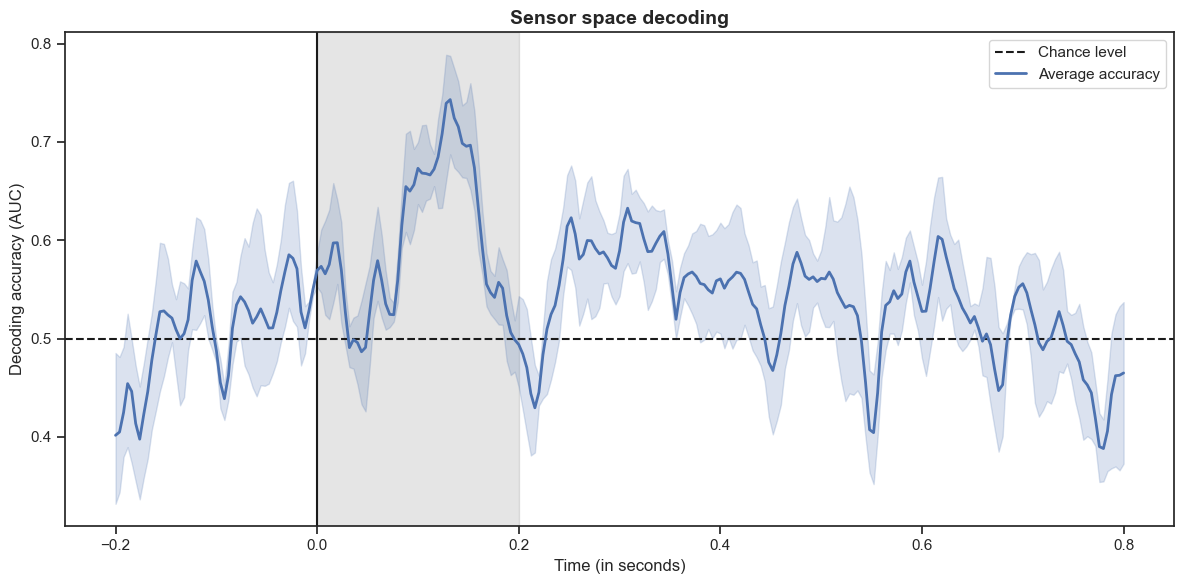

In [20]:
# plotting the decoding accuracy over time
plotting_decoding_scores(
    decoding_scores=scores,
    x_ticks=decoding_epochs.times,
    end_stim=0.2,
    plot_title="Sensor space decoding"
)